In [27]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.figure(figsize=(20,10))
%matplotlib inline 
import seaborn as sns
import sklearn
import scipy

In [28]:
missing_values=["na","N/A","missing"]
data = pd.read_csv("TrainingData.csv",na_values = missing_values)
data=data.drop(['application_key'],axis=1)

In [29]:
data.shape

(83000, 49)

In [30]:
data.head(10)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,default_ind
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,C,10,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,L,732,1
2,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,...,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,C,89,1
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,L,3,0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,L,5,0
5,1579.0,NaN,3.502,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.50000,0.0,NaN,NaN,NaN,C,35,1
6,1818.0,0.4001,0.000,0.0,0.0,NaN,1088.0,NaN,1536.0,1498.0,...,88.171,NaN,0.00000,2.0,0.87224,NaN,0.0,C,2,1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,2,0
8,1836.0,0.1358,0.000,0.0,0.0,347.0,38964.0,17828.0,70729.0,65843.0,...,NaN,NaN,0.00000,10.0,0.89868,0.0,0.0,L,5,1
9,1839.0,0.1981,0.000,0.0,0.0,793.0,6131.0,6045.0,48959.0,31640.0,...,NaN,45.590,0.08824,14.0,0.33834,NaN,0.0,L,3247,0


In [31]:
data.describe()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar48,default_ind
count,79267.000000,77114.000000,82465.000000,82465.000000,82465.000000,63299.000000,7.532600e+04,63291.000000,71318.000000,8.246500e+04,...,76671.000000,17930.000000,25736.000000,80977.000000,82111.000000,74851.000000,37080.000000,59397.000000,83000.000000,83000.000000
mean,1747.511865,1.054816,5.401784,0.461151,1.084012,1633.429280,1.750797e+04,6822.332227,34030.596329,3.022857e+04,...,0.087673,97.851158,72.016570,0.331550,6.553604,0.706595,0.070523,0.093187,556.021277,0.287410
std,94.830127,1.556682,11.091569,1.704292,5.743899,3667.183981,4.677222e+04,10060.346814,50673.150005,6.617798e+04,...,0.423403,29.530657,24.508469,0.373973,6.273107,0.245915,0.290383,0.329054,1106.953295,0.452557
min,1477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.014000,0.000000,0.000000,0.000000,0.060660,0.000000,0.000000,2.000000,0.000000
25%,1680.000000,0.131800,0.000000,0.000000,0.000000,41.000000,1.750250e+03,496.000000,3542.250000,1.153000e+03,...,0.000000,90.149500,58.174750,0.000000,2.000000,0.515280,0.000000,0.000000,8.000000,0.000000
50%,1743.000000,0.513000,0.300000,0.000000,0.000000,297.000000,7.020500e+03,2507.000000,14389.000000,9.525000e+03,...,0.000000,100.000000,78.839500,0.200000,5.000000,0.739500,0.000000,0.000000,17.000000,0.000000
75%,1813.000000,1.386200,6.595000,0.000000,0.000000,1381.000000,1.811300e+04,9869.500000,44413.000000,3.428800e+04,...,0.000000,111.327000,91.596750,0.571430,10.000000,0.945120,0.000000,0.000000,111.000000,1.000000
max,1950.000000,31.018100,399.334000,25.754000,165.492000,94302.000000,5.637108e+06,291810.000000,840658.000000,5.647073e+06,...,21.000000,631.360000,182.111000,2.000000,91.000000,1.000000,7.000000,5.000000,3247.000000,1.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 49 columns):
mvar1          79267 non-null float64
mvar2          77114 non-null float64
mvar3          82465 non-null float64
mvar4          82465 non-null float64
mvar5          82465 non-null float64
mvar6          63299 non-null float64
mvar7          75326 non-null float64
mvar8          63291 non-null float64
mvar9          71318 non-null float64
mvar10         82465 non-null float64
mvar11         36283 non-null float64
mvar12         68422 non-null float64
mvar13         73311 non-null float64
mvar14         83000 non-null int64
mvar15         49481 non-null float64
mvar16         63757 non-null float64
mvar17         66501 non-null float64
mvar18         67641 non-null float64
mvar19         82995 non-null float64
mvar20         82465 non-null float64
mvar21         59538 non-null float64
mvar22         52332 non-null float64
mvar23         40689 non-null float64
mvar24         6347

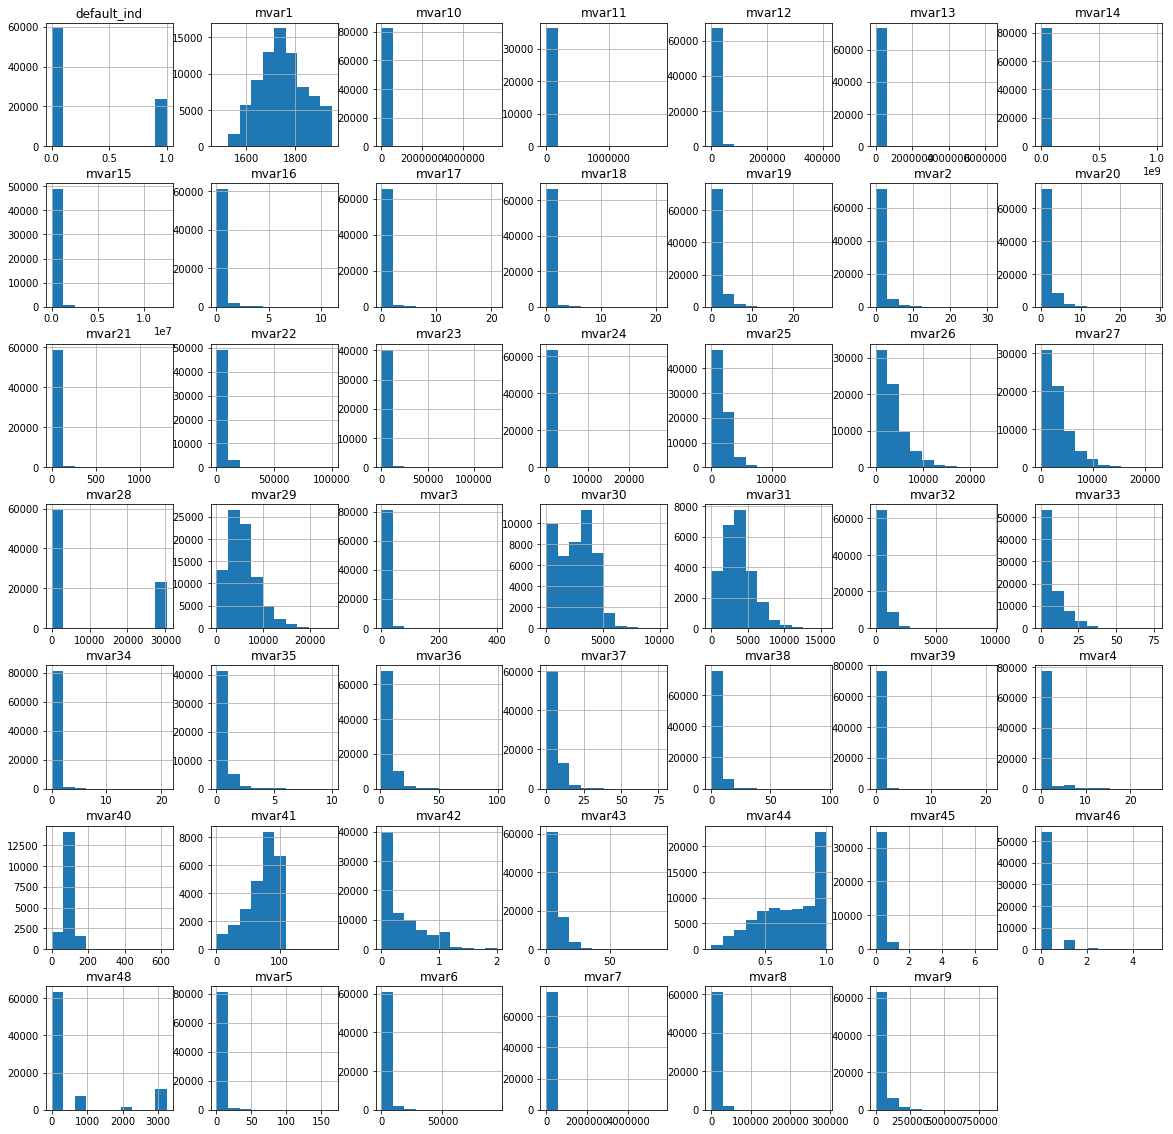

In [33]:
data.hist(figsize=(20,20))
plt.show()

In [34]:
data.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,default_ind
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,C,10,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,L,732,1
2,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,...,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,C,89,1
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,L,3,0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,L,5,0


In [35]:
#imputing N/A and na's with 0
data[['mvar1','mvar2','mvar3','mvar4','mvar5','mvar16','mvar17','mvar18','mvar19','mvar20','mvar21','mvar22','mvar23','mvar24','mvar34','mvar35','mvar36','mvar37','mvar38','mvar39','mvar43','mvar44','mvar45','mvar46'
]] = data[['mvar1','mvar2','mvar3','mvar4','mvar5','mvar16','mvar17','mvar18','mvar19','mvar20','mvar21','mvar22','mvar23','mvar24','mvar34','mvar35','mvar36','mvar37','mvar38','mvar39','mvar43','mvar44','mvar45','mvar46']].fillna(0)

In [36]:
data['default_ind'].value_counts()
#Class Imbalance

0    59145
1    23855
Name: default_ind, dtype: int64

In [37]:
#Number of missing variables
data.isna().sum()

mvar1              0
mvar2              0
mvar3              0
mvar4              0
mvar5              0
mvar6          19701
mvar7           7674
mvar8          19709
mvar9          11682
mvar10           535
mvar11         46717
mvar12         14578
mvar13          9689
mvar14             0
mvar15         33519
mvar16             0
mvar17             0
mvar18             0
mvar19             0
mvar20             0
mvar21             0
mvar22             0
mvar23             0
mvar24             0
mvar25          7862
mvar26         10929
mvar27         13650
mvar28           535
mvar29           535
mvar30         37988
mvar31         58539
mvar32          7862
mvar33          1869
mvar34             0
mvar35             0
mvar36             0
mvar37             0
mvar38             0
mvar39             0
mvar40         65070
mvar41         57264
mvar42          2023
mvar43             0
mvar44             0
mvar45             0
mvar46             0
mvar47             0
mvar48       

In [38]:
# % of missing values
data.isna().sum()/data.shape[0]*100 

mvar1           0.000000
mvar2           0.000000
mvar3           0.000000
mvar4           0.000000
mvar5           0.000000
mvar6          23.736145
mvar7           9.245783
mvar8          23.745783
mvar9          14.074699
mvar10          0.644578
mvar11         56.285542
mvar12         17.563855
mvar13         11.673494
mvar14          0.000000
mvar15         40.384337
mvar16          0.000000
mvar17          0.000000
mvar18          0.000000
mvar19          0.000000
mvar20          0.000000
mvar21          0.000000
mvar22          0.000000
mvar23          0.000000
mvar24          0.000000
mvar25          9.472289
mvar26         13.167470
mvar27         16.445783
mvar28          0.644578
mvar29          0.644578
mvar30         45.768675
mvar31         70.528916
mvar32          9.472289
mvar33          2.251807
mvar34          0.000000
mvar35          0.000000
mvar36          0.000000
mvar37          0.000000
mvar38          0.000000
mvar39          0.000000
mvar40         78.397590


In [39]:
data.shape

(83000, 49)

Treshold =60% : Drop features with more than 60% NaN`

In [40]:
threshold = 0.5
#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
#data = data.loc[data.isnull().mean(axis=1) < threshold]


In [41]:
data.shape

(83000, 45)

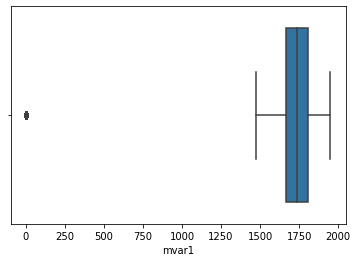

In [42]:
sns.boxplot(data['mvar1'])

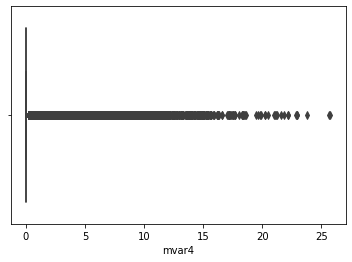

In [43]:
sns.boxplot(data['mvar4'])

In [44]:
#imputing the data with median since most of the data is skewed 
data= data.fillna(data.median())
data.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,default_ind
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,4.0,1.0,0.08696,10.0,0.63899,0.0,0.0,C,10,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,2.0,0.0,0.00000,13.0,0.63836,0.0,0.0,L,732,1
2,1745.0,0.4001,0.000,0.0,0.0,297.0,2536.0,2507.0,14389.0,2536.0,...,1.0,0.0,0.00000,1.0,1.00000,0.0,0.0,C,89,1
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,2.0,0.0,0.15385,3.0,0.53241,0.0,0.0,L,3,0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,2.0,0.0,0.00000,1.0,0.92665,0.0,0.0,L,5,0


In [45]:
#Encoding mvar47
encoded_columns = pd.get_dummies(data['mvar47'])
data = data.join(encoded_columns).drop('mvar47', axis=1)

In [46]:
#rearranging the rows
data = data[['mvar1','mvar2','mvar3','mvar4','mvar5','mvar6','mvar7','mvar8','mvar9','mvar10','mvar12','mvar13','mvar14','mvar15','mvar16','mvar17','mvar18','mvar19','mvar20','mvar21','mvar22','mvar23','mvar24','mvar25','mvar26','mvar27','mvar28','mvar29','mvar30','mvar32','mvar33','mvar34','mvar35','mvar36','mvar37','mvar38','mvar39','mvar42','mvar43','mvar44','mvar45','mvar46','mvar48','C','L','default_ind']]

<Figure size 1080x1080 with 0 Axes>

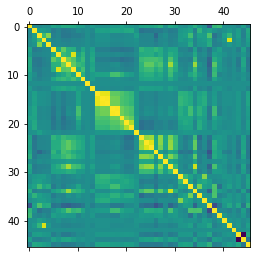

In [47]:
plt.figure(figsize=(15, 15))
plt.matshow(data.corr())
plt.show()

In [48]:
#handling outliers using Z scores
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.07244779 0.44211348 0.48507727 ... 0.7712555  0.7712555  0.6350833 ]
 [0.47368633 0.11183402 0.48507727 ... 1.29658719 1.29658719 1.57459659]
 [0.20351905 0.38034705 0.48507727 ... 0.7712555  0.7712555  1.57459659]
 ...
 [0.63685667 0.61777187 0.48507727 ... 1.29658719 1.29658719 0.6350833 ]
 [0.20084412 0.55754654 0.48507727 ... 1.29658719 1.29658719 0.6350833 ]
 [0.4362374  0.37783826 0.48507727 ... 1.29658719 1.29658719 0.6350833 ]]


In [49]:
data.shape

(83000, 46)

In [50]:
data = data[(z < 4).all(axis=1)]

In [51]:
data.shape

(62499, 46)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62499 entries, 0 to 82999
Data columns (total 46 columns):
mvar1          62499 non-null float64
mvar2          62499 non-null float64
mvar3          62499 non-null float64
mvar4          62499 non-null float64
mvar5          62499 non-null float64
mvar6          62499 non-null float64
mvar7          62499 non-null float64
mvar8          62499 non-null float64
mvar9          62499 non-null float64
mvar10         62499 non-null float64
mvar12         62499 non-null float64
mvar13         62499 non-null float64
mvar14         62499 non-null int64
mvar15         62499 non-null float64
mvar16         62499 non-null float64
mvar17         62499 non-null float64
mvar18         62499 non-null float64
mvar19         62499 non-null float64
mvar20         62499 non-null float64
mvar21         62499 non-null float64
mvar22         62499 non-null float64
mvar23         62499 non-null float64
mvar24         62499 non-null float64
mvar25         6249

In [53]:
data.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar42,mvar43,mvar44,mvar45,mvar46,mvar48,C,L,default_ind
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,1.0,0.08696,10.0,0.63899,0.0,0.0,10,1,0,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,0.0,0.00000,13.0,0.63836,0.0,0.0,732,0,1,1
2,1745.0,0.4001,0.000,0.0,0.0,297.0,2536.0,2507.0,14389.0,2536.0,...,0.0,0.00000,1.0,1.00000,0.0,0.0,89,1,0,1
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,0.0,0.15385,3.0,0.53241,0.0,0.0,3,0,1,0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,0.0,0.00000,1.0,0.92665,0.0,0.0,5,0,1,0


In [55]:
X = data.iloc[:, :-1].values # Features
y = data.iloc[:, 45].values #target variable
y

array([0, 1, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train=min_max.fit_transform(X_train)
X_test=min_max.fit_transform(X_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
y_knn = knn.predict(X_test)

In [61]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_knn))

Accuracy: 0.7512


In [62]:
from xgboost import XGBClassifier
# fit model no training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
y_xgb = xgb.predict(X_test)
predictions = [round(value) for value in y_xgb]


In [65]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.62%


In [66]:
#SVM 
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [67]:
y_svm = clf.predict(X_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_svm))

Accuracy: 0.7484


In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [71]:
y_rf= rf.predict(X_test)

In [79]:
metrics.accuracy_score(y_test, y_rf.round(), normalize=True)

0.78576

In [80]:
#smote
X_smote = data.loc[:, data.columns != 'default_ind']
y_smote = data.loc[:, data.columns == 'default_ind']

In [83]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_trainSmote, X_testSmote, y_trainSmote, y_testSmote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
columns = X_trainSmote.columns

Using TensorFlow backend.
/home/rahul-mn/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rahul-mn/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rahul-mn/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rahul-mn/.local/lib/python3.7/site-packages/tensorflo

In [95]:
os_data_X,os_data_y=os.fit_sample(X_trainSmote, y_trainSmote)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['default_ind'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['default_ind']==0]))
print("Number of subscription",len(os_data_y[os_data_y['default_ind']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['default_ind']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['default_ind']==1])/len(os_data_X))

/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  64786
Number of no subscription in oversampled data 32393
Number of subscription 32393
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_trainSmote, y_trainSmote)

/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

[False  True False  True  True False False False False False False False
 False False  True  True  True  True  True False False False False False
 False False False False False False False  True  True  True  True  True
  True  True  True  True False  True False  True  True]
[ 2  1  4  1  1  9 19 11 16 22 20 18 25 24  1  1  1  1  1  5 21 13 12  7
 17 23 14 10 15  6  3  1  1  1  1  1  1  1  1  1 26  1  8  1  1]
